<a href="https://colab.research.google.com/github/sayapakailinuxpak/Coral-ID/blob/ml/script_augmented_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Script for Making Augmented Images**
The techniques for data augmentation on this model is based on Gómez-Ríos et al. (2019)'s "[Coral species identification with texture or structure images using a two-level classifier based on Convolutional Neural Networks](https://doi.org/10.1016/j.knosys.2019.104891)".

Honorable Mentions:
*   [The Keras Blog](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
*   [Python for Microscopists by Sreenivas Bhattiprolu](https://)




In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/ML-dataset/StructureRSMAS'
!ls

/content/drive/MyDrive/ML-dataset/StructureRSMAS
ACER  APAL  CNAT  MALC	MCAV  MMEA  SSID


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import os

# Make new directory for augmented images
os.mkdir('/content/drive/MyDrive/ML-dataset/augStructureRSMAS/')

# Define the parameters for augmentation
datagen = ImageDataGenerator(rescale = 1/255,
                             # pick horizontal and zoom for augmentation
                             horizontal_flip = True,
                             zoom_range = 0.4,
                             fill_mode = 'reflect')  # 'reflect' makes the augmented images more natural

In [ ]:
# Set the augmented and dataset directory
augmented_directory = '/content/drive/MyDrive/ML-dataset/augStructureRSMAS'
dataset_directory = '/content/drive/MyDrive/ML-dataset/StructureRSMAS'

# Iterate on all dataset directory
dataset_class_list = os.listdir(dataset_directory)

for dataset in dataset_class_list:
    temp_augmented_directory = augmented_directory + '/{}'.format(dataset)
    temp_dataset_directory = dataset_directory + '/{}'.format(dataset)

    print(temp_augmented_directory)
    if not os.path.isdir(temp_augmented_directory):
        print("[!] Doesn't exists, creating directory in {}".format(temp_augmented_directory))
        os.mkdir(temp_augmented_directory)

    i = 0
    for batch in datagen.flow_from_directory(directory = dataset_directory,
                                             batch_size = 16,
                                             target_size = (256, 256),
                                             color_mode = 'rgb',
                                             save_to_dir = temp_augmented_directory.format(dataset),
                                             save_prefix = 'aug',
                                             save_format = 'jpg',
                                             classes=[dataset]):
        i += 1
        if i > 20: #will generate 21 new images per image per class
            break
            print("[+] Successfully creating augmented image on directory in {}".format(temp_augmented_directory))

/content/drive/MyDrive/ML-dataset/augStructureRSMAS/MMEA
[!] Doesn't exists, creating directory in /content/drive/MyDrive/ML-dataset/augStructureRSMAS/MMEA
Found 30 images belonging to 1 classes.
/content/drive/MyDrive/ML-dataset/augStructureRSMAS/MCAV
[!] Doesn't exists, creating directory in /content/drive/MyDrive/ML-dataset/augStructureRSMAS/MCAV
Found 38 images belonging to 1 classes.
/content/drive/MyDrive/ML-dataset/augStructureRSMAS/CNAT
[!] Doesn't exists, creating directory in /content/drive/MyDrive/ML-dataset/augStructureRSMAS/CNAT
Found 34 images belonging to 1 classes.
/content/drive/MyDrive/ML-dataset/augStructureRSMAS/APAL
[!] Doesn't exists, creating directory in /content/drive/MyDrive/ML-dataset/augStructureRSMAS/APAL
Found 41 images belonging to 1 classes.
/content/drive/MyDrive/ML-dataset/augStructureRSMAS/ACER
[!] Doesn't exists, creating directory in /content/drive/MyDrive/ML-dataset/augStructureRSMAS/ACER
Found 44 images belonging to 1 classes.
/content/drive/MyDri

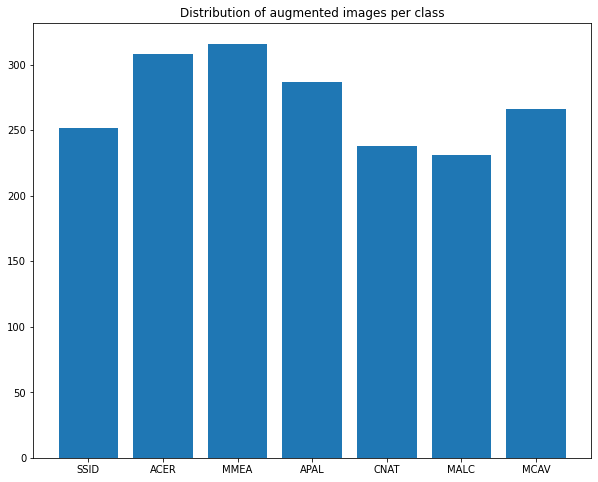

In [ ]:
# Visualize the distribution of augmented images per class
import matplotlib.pyplot as plt

image_folder = ['SSID', 'ACER','MMEA','APAL','CNAT','MALC','MCAV']
nimgs = {}

for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/ML-dataset/augStructureRSMAS/'+i+'/'))
    nimgs[i] = nimages

plt.figure(figsize = (10, 8))
plt.bar(range(len(nimgs)), list(nimgs.values()), align = 'center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of augmented images per class')
plt.show()